In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, SGDRegressor
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier


In [4]:
# Load Dataset
df = pd.read_csv("heart_rate_anomaly_data.csv")


In [5]:
#Data Preprocessing
X = df.drop('is_anomaly', axis=1)
y = df['is_anomaly']


In [6]:
# Standardization
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [7]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


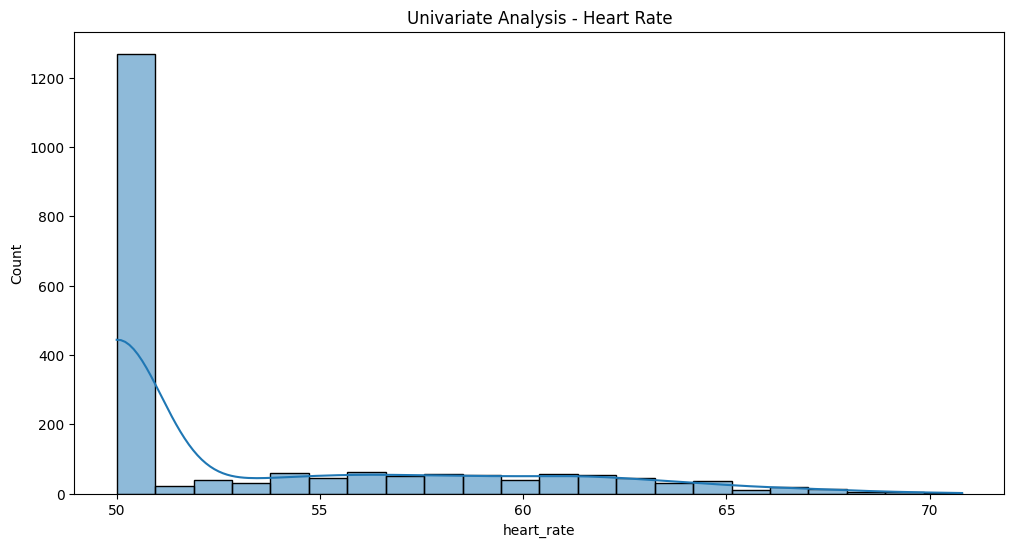

In [8]:
# Univariate EDA
plt.figure(figsize=(12, 6))
sns.histplot(df['heart_rate'], kde=True)
plt.title('Univariate Analysis - Heart Rate')
plt.show()


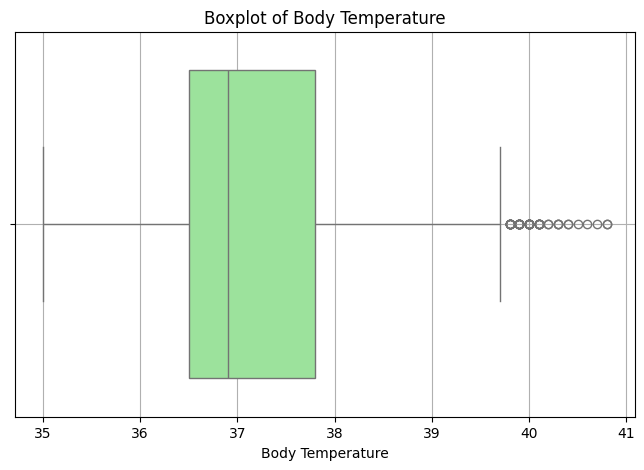

In [26]:
# Boxplot of Body Temperature
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['body_temp'], color='lightgreen')
plt.title('Boxplot of Body Temperature')
plt.xlabel('Body Temperature')
plt.grid(True)
plt.show()


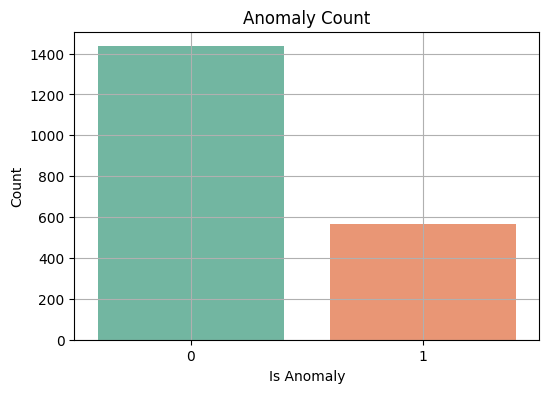

In [28]:
# Countplot for Anomaly
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_anomaly', hue='is_anomaly', palette='Set2', legend=False)
plt.title('Anomaly Count')
plt.xlabel('Is Anomaly')
plt.ylabel('Count')
plt.grid(True)
plt.show()


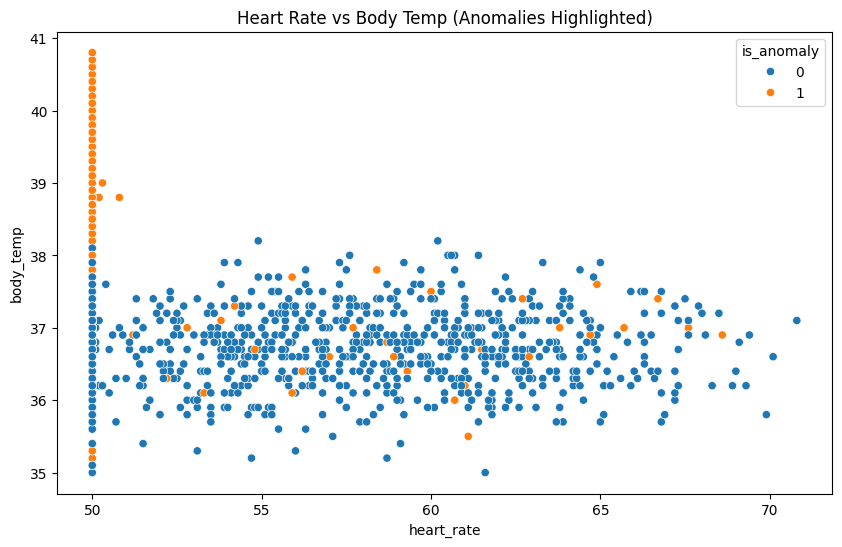

In [9]:
# Bivariate EDA
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='heart_rate', y='body_temp', hue='is_anomaly')
plt.title('Heart Rate vs Body Temp (Anomalies Highlighted)')
plt.show()


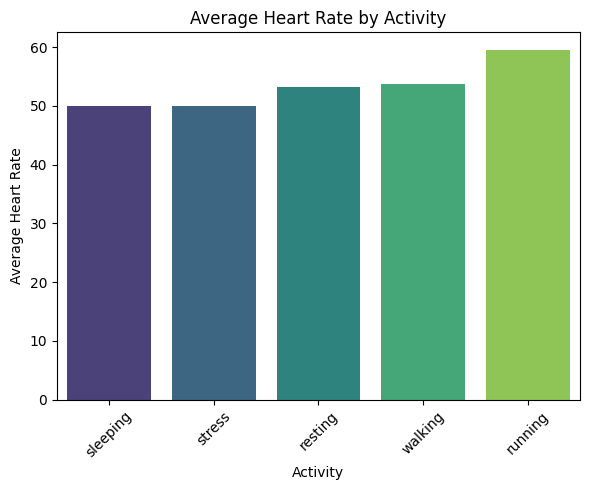

In [58]:
plt.figure(figsize=(6,5))
sns.barplot(x=avg_hr.index, y=avg_hr.values, hue=avg_hr.index, palette='viridis', legend=False)
plt.xlabel('Activity')
plt.ylabel('Average Heart Rate')
plt.title('Average Heart Rate by Activity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


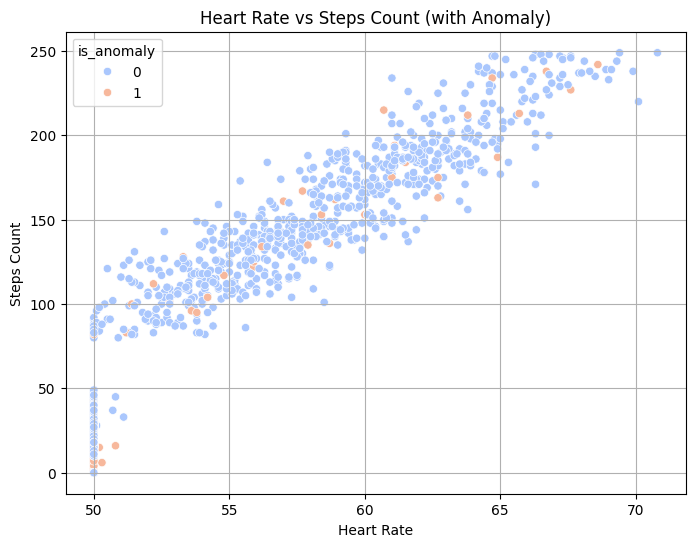

In [29]:
# Heart Rate vs Steps Count with Anomaly Hue
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='heart_rate', y='steps_count', hue='is_anomaly', palette='coolwarm')
plt.title('Heart Rate vs Steps Count (with Anomaly)')
plt.xlabel('Heart Rate')
plt.ylabel('Steps Count')
plt.grid(True)
plt.show()


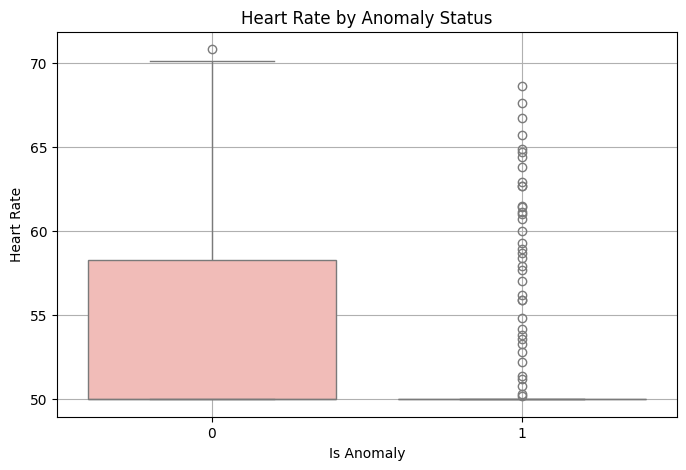

In [33]:
#Boxplot of Heart Rate grouped by Anomaly
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='is_anomaly', y='heart_rate', hue='is_anomaly', palette='Pastel1', legend=False)
plt.title('Heart Rate by Anomaly Status')
plt.xlabel('Is Anomaly')
plt.ylabel('Heart Rate')
plt.grid(True)
plt.show()


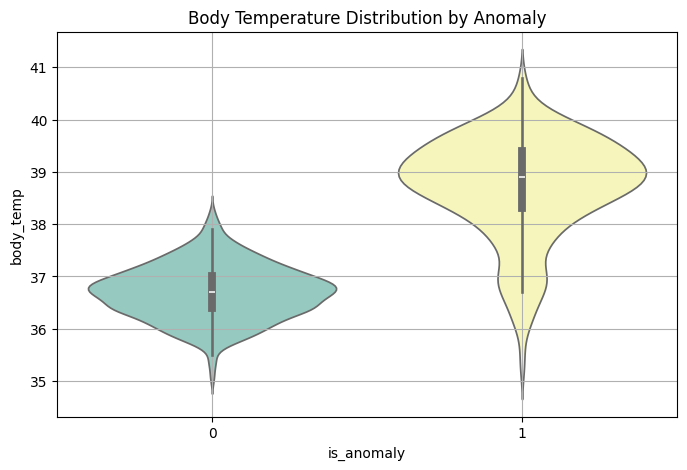

In [32]:
#Violin plot
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='is_anomaly', y='body_temp', hue='is_anomaly', palette='Set3', legend=False)
plt.title('Body Temperature Distribution by Anomaly')
plt.grid(True)
plt.show()


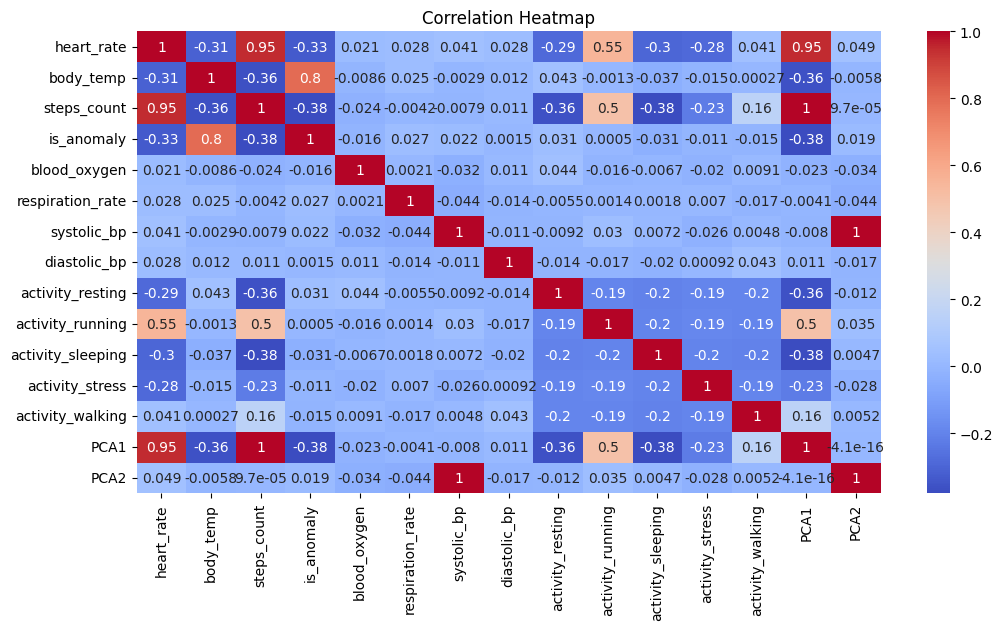

In [49]:
# Multivariate - Correlation Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


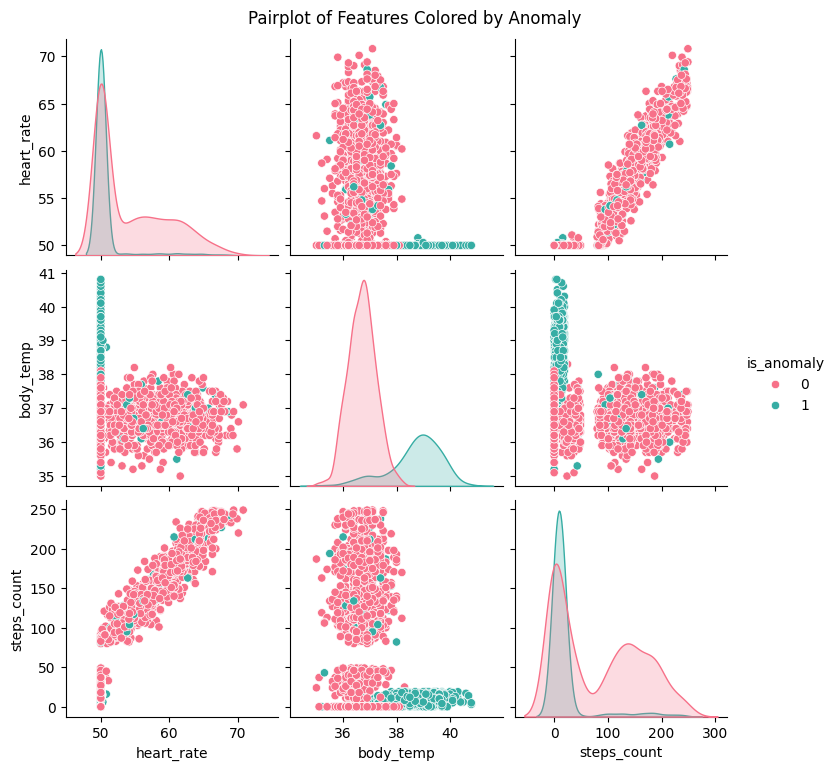

In [35]:
# Pairplot for selected features
sns.pairplot(df[['heart_rate', 'body_temp', 'steps_count', 'is_anomaly']], hue='is_anomaly', palette='husl')
plt.suptitle('Pairplot of Features Colored by Anomaly', y=1.02)
plt.show()


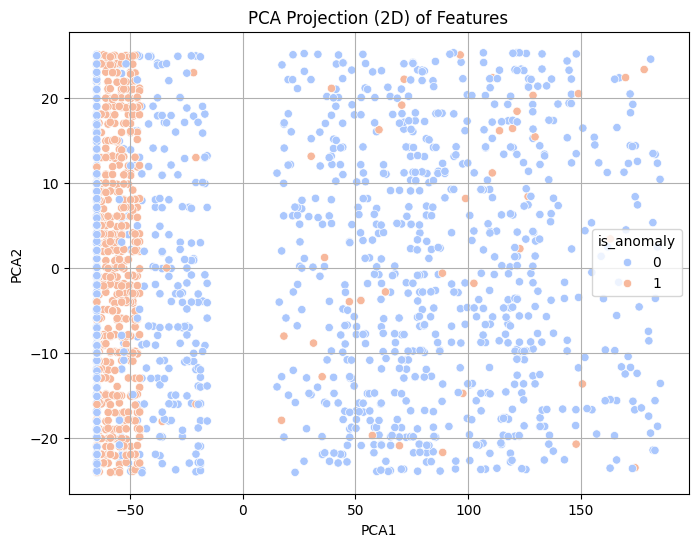

In [36]:
# PCA Scatter Plot
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop('is_anomaly', axis=1))
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='is_anomaly', data=df, palette='coolwarm')
plt.title('PCA Projection (2D) of Features')
plt.grid(True)
plt.show()

In [11]:
# Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", conf_matrix)


Confusion Matrix:
 [[438   2]
 [ 24 136]]


In [13]:
# PCA (Dimensionality Reduction)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [14]:
# Ridge Regression (Regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


In [15]:
# Linear Regression (y = mx + b)
x_line = df['heart_rate'].values.reshape(-1, 1)
y_line = df['is_anomaly'].values
line_model = Ridge()
line_model.fit(x_line, y_line)
m = line_model.coef_[0]
b = line_model.intercept_
print(f"Linear Regression Line: y = {m:.4f}x + {b:.4f}")



Linear Regression Line: y = -0.0300x + 1.8812


In [22]:
# XGBoost Classifier (Fixed)
xgb = XGBClassifier(eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)


In [17]:
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)
print(f"RMSE: {rmse:.4f}, MSE: {mse:.4f}, R² Score: {r2:.4f}")



RMSE: 0.2082, MSE: 0.0433, R² Score: 0.7784


In [18]:
# Gradient Descent with SGD
sgd = SGDRegressor(max_iter=1000, tol=1e-3)
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)



In [19]:
# Cross Validation
cv_scores = cross_val_score(rf, X_scaled, y, cv=5)
print("Cross-Validation Scores (RF):", cv_scores)



Cross-Validation Scores (RF): [0.88   0.9875 0.99   0.9925 0.9475]


In [24]:
#Correlation & Covariance
print("\nCorrelation Matrix:\n", df.corr())
print("\nCovariance Matrix:\n", df.cov())


Correlation Matrix:
                    heart_rate  body_temp  steps_count  is_anomaly  \
heart_rate           1.000000  -0.314071     0.947723   -0.332228   
body_temp           -0.314071   1.000000    -0.362994    0.800461   
steps_count          0.947723  -0.362994     1.000000   -0.376195   
is_anomaly          -0.332228   0.800461    -0.376195    1.000000   
blood_oxygen         0.021475  -0.008555    -0.023592   -0.016443   
respiration_rate     0.027705   0.025475    -0.004188    0.027188   
systolic_bp          0.041074  -0.002915    -0.007890    0.022240   
diastolic_bp         0.028097   0.012333     0.011218    0.001467   
activity_resting    -0.285653   0.043176    -0.359472    0.030669   
activity_running     0.551753  -0.001325     0.495409    0.000501   
activity_sleeping   -0.298156  -0.036952    -0.379152   -0.030995   
activity_stress     -0.282813  -0.015396    -0.227654   -0.011142   
activity_walking     0.041412   0.000266     0.158571   -0.014806   

           